This notebook reproduces the 'leave-one-feature-out' analyses

## Imports

In [1]:
import pickle
import numpy as np
import pandas as pd
from os.path import join as opj
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('ticks')
sns.set_palette('muted')
mpl.rcParams['pdf.fonttype'] = 42

## Set paths

In [2]:
datadir = '../../../data/processed/'
figdir = '../../../paper/figs/'

## Load & format data

In [3]:
feature_similarity = pd.read_pickle(opj(datadir, 'feature_similarity.p'))
feature_contribution = pd.read_pickle(opj(datadir, 'feature_contribution.p'))

feature_contribution.sort_values('full vid corr', inplace=True)
feature_contribution['color'] = sns.color_palette()
feature_similarity.sort_values('All features', axis=0, ascending=False, inplace=True)
feature_similarity.sort_values('All features', axis=1, ascending=False, inplace=True)

A = feature_contribution[['full vid corr', 'color']][:-1]
B = pd.concat([feature_contribution.loc['All features', 'vid rec corr':'color'].to_frame().T, 
               feature_contribution.loc[:, 'vid rec corr':'color'][:-1].sort_values('vid rec corr')], 
             axis=0)
C = feature_similarity

## Plot

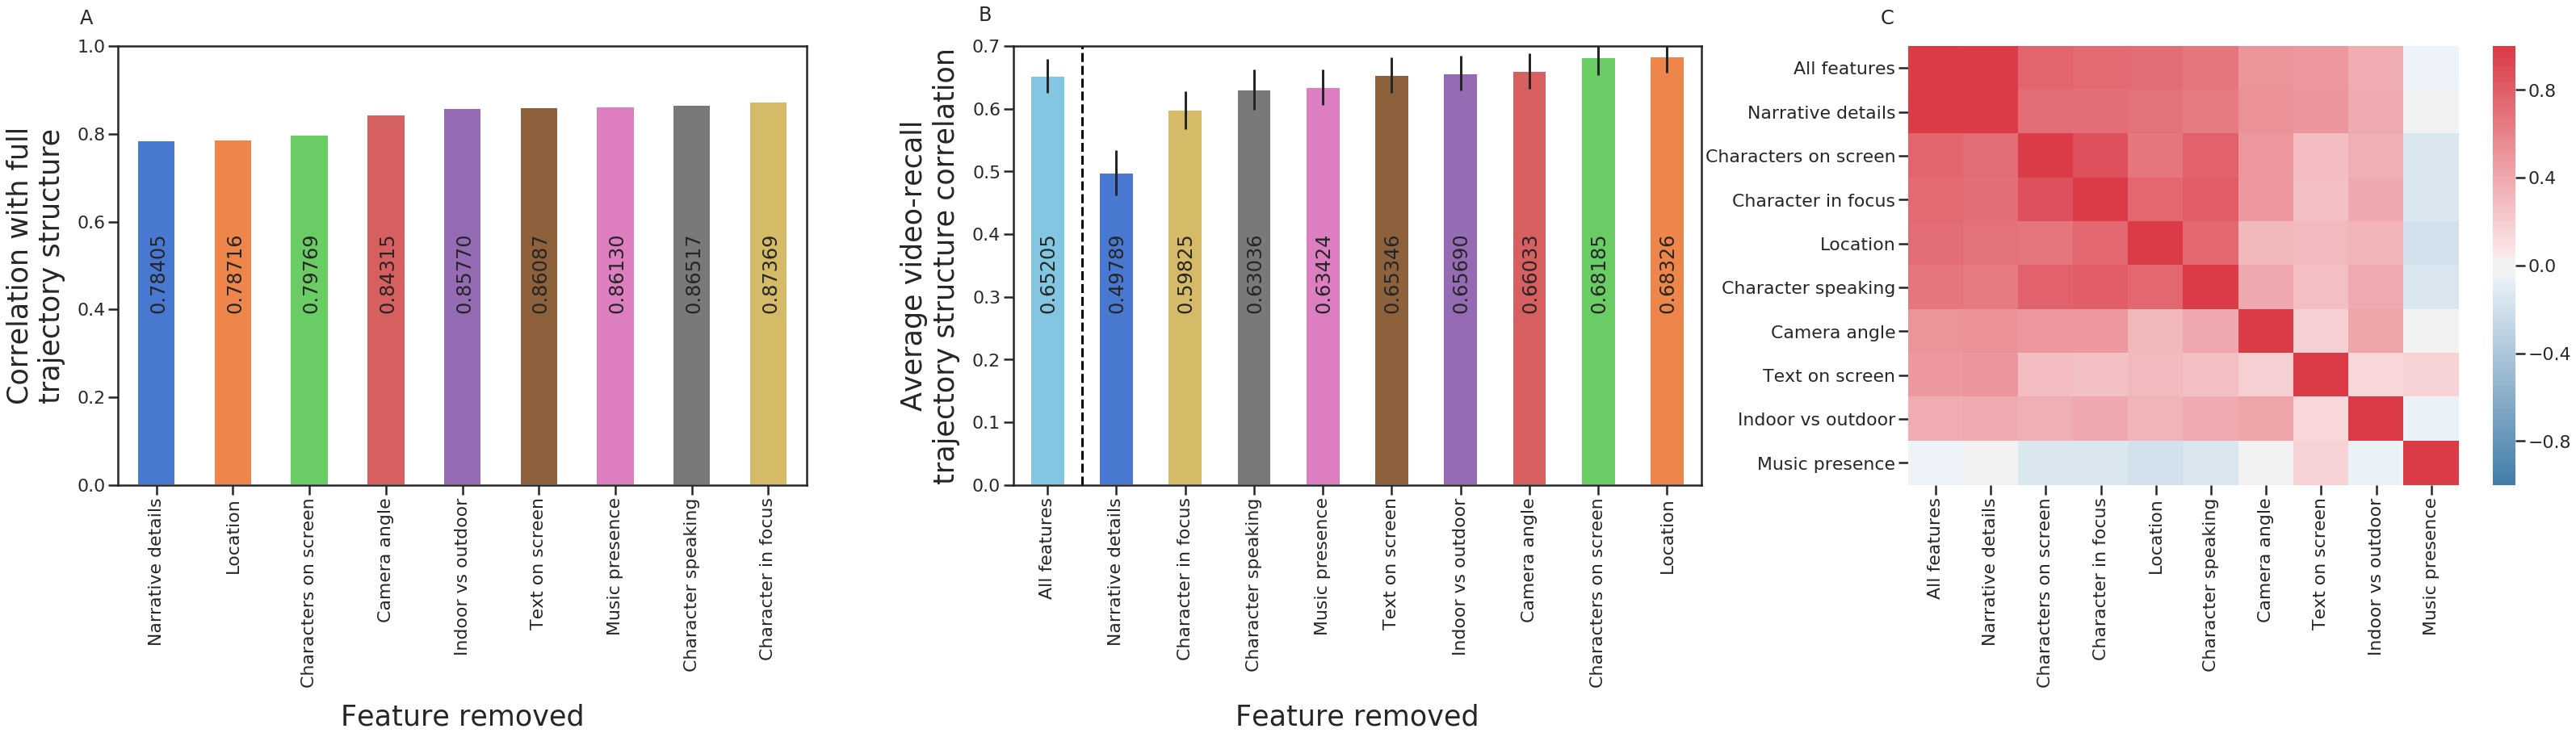

In [4]:
fig, (ax_a, ax_b, ax_c) = plt.subplots(1,3)
fig.set_size_inches(55, 10)
plt.subplots_adjust(wspace=.3)


# A
A['full vid corr'].plot(kind='bar', ylim=[0, 1], color=A['color'], ax=ax_a)
ax_a.text(-1, 1.05, 'A')

for idx, corr in enumerate(A['full vid corr']):
    ax_a.text(idx - .1, 0.4, f'{corr:.5f}', rotation='vertical')

ax_a.set_ylabel('Correlation with full\ntrajectory structure', size=35, labelpad=15)
ax_a.set_xlabel('Feature removed', size=35, labelpad=20)

# B
B['vid rec corr'].plot(kind='bar', ylim=[0, .7], yerr=B['vid rec sem'], color=B['color'], ax=ax_b)

ax_b.axvline(0.5, color='k', linestyle='dashed')
ax_b.text(-1, .74, 'B')
for idx, corr in enumerate(B['vid rec corr']):
    ax_b.text(idx - .13, 0.28, f'{corr:.5f}', rotation='vertical')

ax_b.set_ylabel('Average video-recall\ntrajectory structure correlation', size=35, labelpad=15)
ax_b.set_xlabel('Feature removed', size=35, labelpad=20)

# C
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(C, vmin=-1, vmax=1, cmap=cmap, ax=ax_c)
ax_c.text(-.5, -.5, 'C')

plt.subplots_adjust()
# plt.savefig(opj(figdir, 'feature_value.pdf'), bbox_inches='tight')
plt.show()